In [1]:
import pandas

# Pandas can read from the s3 directly - 

In [2]:
df = pandas.read_csv('s3://dev-et-data/tarballs/amazonPriceList.csv', sep=',')

/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (28,29,30,31,32,33,34,36,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(166505, 70)

# 166 Thousand Rows and 7- Columns in this EC2 service catalog

In [4]:
df.columns

Index(['SKU', 'OfferTermCode', 'RateCode', 'TermType', 'PriceDescription',
       'EffectiveDate', 'StartingRange', 'EndingRange', 'Unit', 'PricePerUnit',
       'Currency', 'LeaseContractLength', 'PurchaseOption', 'OfferingClass',
       'Product Family', 'serviceCode', 'Location', 'Location Type',
       'Instance Type', 'Current Generation', 'Instance Family', 'vCPU',
       'Physical Processor', 'Clock Speed', 'Memory', 'Storage',
       'Network Performance', 'Processor Architecture', 'Storage Media',
       'Volume Type', 'Max Volume Size', 'Max IOPS/volume',
       'Max IOPS Burst Performance', 'Max throughput/volume', 'Provisioned',
       'Tenancy', 'EBS Optimized', 'Operating System', 'License Model',
       'Group', 'Group Description', 'Transfer Type', 'From Location',
       'From Location Type', 'To Location', 'To Location Type', 'usageType',
       'operation', 'Comments', 'Dedicated EBS Throughput', 'ECU',
       'Enhanced Networking Supported', 'GPU', 'Instance Capacit

In [5]:
subset = df[['Location', 'Instance Type', 'vCPU', 'Operating System', 'Instance Family', 'Tenancy', 'Memory', 'LeaseContractLength', 'Unit', 'PricePerUnit', 'TermType', 'Currency', 'PurchaseOption']] # subset multiple columns

In [6]:
subset.head()

,Location,Instance Type,vCPU,Operating System,Instance Family,Tenancy,Memory,LeaseContractLength,Unit,PricePerUnit,TermType,Currency,PurchaseOption
0,US East (Ohio),m4.xlarge,4.0,RHEL,General purpose,Dedicated,16 GiB,1yr,Hrs,0.2230,Reserved,USD,No Upfront
1,EU (Frankfurt),r4.16xlarge,64.0,Windows,Memory optimized,Shared,488 GiB,3yr,Hrs,6.6146,Reserved,USD,No Upfront
2,Asia Pacific (Seoul),i2.4xlarge,16.0,Windows,Storage optimized,Dedicated,122 GiB,NaN,Hrs,5.1382,OnDemand,USD,NaN
3,Asia Pacific (Singapore),m3.2xlarge,8.0,Windows,General purpose,Dedicated,30 GiB,1yr,Hrs,1.0070,Reserved,USD,Partial Upfront
4,Asia Pacific (Sydney),m1.medium,1.0,RHEL,General purpose,Shared,3.75 GiB,1yr,Quantity,1080.0000,Reserved,USD,All Upfront


In [7]:
subset.shape

(166505, 13)

In [8]:
subset['Tenancy'].value_counts()

Shared       84502
Dedicated    75353
Host          5364
Name: Tenancy, dtype: int64

In [9]:
%matplotlib inline

<AxesSubplot:>

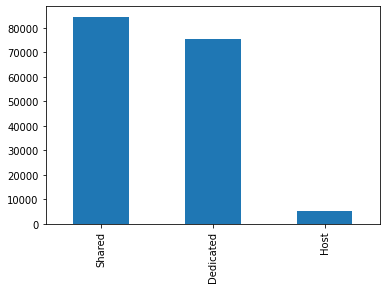

In [10]:
subset['Tenancy'].value_counts().plot(kind='bar')

In [11]:
t2_nano=subset[subset['Instance Type'] == "t2.nano"]

In [12]:
t2_nano[:6]

,Location,Instance Type,vCPU,Operating System,Instance Family,Tenancy,Memory,LeaseContractLength,Unit,PricePerUnit,TermType,Currency,PurchaseOption
126,Asia Pacific (Seoul),t2.nano,1.0,Windows,General purpose,Shared,0.5 GiB,3yr,Quantity,179.0000,Reserved,USD,All Upfront
515,Asia Pacific (Mumbai),t2.nano,1.0,Linux,General purpose,Shared,0.5 GiB,3yr,Hrs,0.0027,Reserved,USD,Partial Upfront
518,South America (Sao Paulo),t2.nano,1.0,Linux,General purpose,Shared,0.5 GiB,3yr,Hrs,0.0026,Reserved,USD,Partial Upfront
685,South America (Sao Paulo),t2.nano,1.0,Linux,General purpose,Shared,0.5 GiB,1yr,Hrs,0.0062,Reserved,USD,No Upfront
691,US East (N. Virginia),t2.nano,1.0,Windows,General purpose,Shared,0.5 GiB,3yr,Quantity,66.0000,Reserved,USD,Partial Upfront
695,Asia Pacific (Seoul),t2.nano,1.0,SUSE,General purpose,Shared,0.5 GiB,3yr,Quantity,301.0000,Reserved,USD,All Upfront


In [13]:
t2_nano.columns

Index(['Location', 'Instance Type', 'vCPU', 'Operating System',
       'Instance Family', 'Tenancy', 'Memory', 'LeaseContractLength', 'Unit',
       'PricePerUnit', 'TermType', 'Currency', 'PurchaseOption'],
      dtype='object')

In [14]:
t2_nano_jr = t2_nano[['Location', 'Operating System', 'LeaseContractLength', 'Unit', 'PricePerUnit', 'Currency','PurchaseOption']]

In [15]:
#t2_nano_jr[:7]

In [16]:
t2_nano_1yr=t2_nano_jr[t2_nano_jr['LeaseContractLength'] == "1yr"]

In [17]:
#t2_nano_1yr[:8]

In [18]:
t2_nano_1yr_linux=t2_nano_1yr[t2_nano_1yr['Operating System'] == "Linux"]

In [19]:
#t2_nano_1yr_linux[:10]

In [20]:
t2_nano_tony=t2_nano_1yr_linux[t2_nano_1yr_linux['Unit'] == "Quantity"]

In [21]:
#t2_nano_tony

In [22]:
t2_s = t2_nano_tony.sort_values('Location')

In [23]:
#t2_s

In [24]:
t2_a = t2_s[t2_s['PurchaseOption'] == "All Upfront"]

In [25]:
t2_a

,Location,Operating System,LeaseContractLength,Unit,PricePerUnit,Currency,PurchaseOption
124313,AWS GovCloud (US),Linux,1yr,Quantity,39.0,USD,All Upfront
26115,Asia Pacific (Mumbai),Linux,1yr,Quantity,47.0,USD,All Upfront
113874,Asia Pacific (Seoul),Linux,1yr,Quantity,51.0,USD,All Upfront
148280,Asia Pacific (Singapore),Linux,1yr,Quantity,48.0,USD,All Upfront
148954,Asia Pacific (Sydney),Linux,1yr,Quantity,52.0,USD,All Upfront
15792,Asia Pacific (Tokyo),Linux,1yr,Quantity,51.0,USD,All Upfront
19919,Canada (Central),Linux,1yr,Quantity,38.0,USD,All Upfront
148574,EU (Frankfurt),Linux,1yr,Quantity,40.0,USD,All Upfront
67152,EU (Ireland),Linux,1yr,Quantity,37.0,USD,All Upfront
5726,EU (London),Linux,1yr,Quantity,39.0,USD,All Upfront


In [26]:
t2_f = t2_a[['Location', 'PricePerUnit']]

In [27]:
#t2_f

In [28]:
t2_cheap = t2_f.sort_values('PricePerUnit')

In [29]:
t2_cheap

,Location,PricePerUnit
50615,US East (N. Virginia),34.0
104335,US East (Ohio),34.0
41003,US West (Oregon),34.0
67152,EU (Ireland),37.0
19919,Canada (Central),38.0
124313,AWS GovCloud (US),39.0
5726,EU (London),39.0
148574,EU (Frankfurt),40.0
126658,US West (N. California),45.0
26115,Asia Pacific (Mumbai),47.0


<AxesSubplot:>

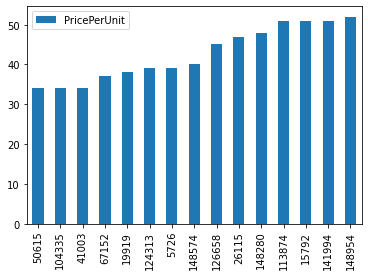

In [30]:
t2_cheap.plot(kind='bar')

In [31]:
#t2_cheap.plot(y='PricePerUnit', kind="bar")

In [32]:
#t2_cheap.plot(x='Location', y='PricePerUnit', kind="bar")

<AxesSubplot:xlabel='Location'>

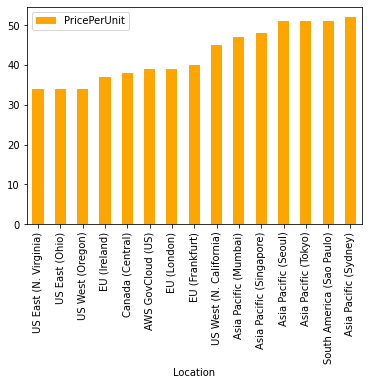

In [33]:
t2_cheap.plot(x='Location', y='PricePerUnit', kind="bar", color='orange')

In [34]:
subset.groupby('Location')['Instance Type'].count()

Location
AWS GovCloud (US)            12183
Asia Pacific (Mumbai)         8895
Asia Pacific (Seoul)          9115
Asia Pacific (Singapore)     12308
Asia Pacific (Sydney)        12733
Asia Pacific (Tokyo)         13114
Canada (Central)              6836
EU (Frankfurt)               10755
EU (Ireland)                 13609
EU (London)                   6866
South America (Sao Paulo)    10246
US East (N. Virginia)        13730
US East (Ohio)                9496
US West (N. California)      12208
US West (Oregon)             13525
Name: Instance Type, dtype: int64

# Not all regions are created equal- Oregon and Virginia typically get more services quicker

<AxesSubplot:xlabel='Location'>

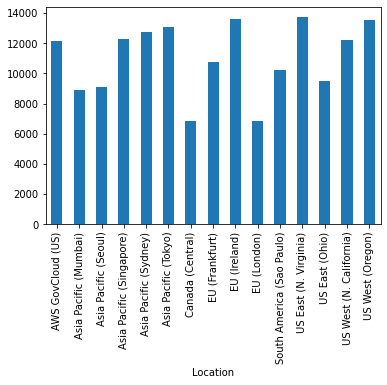

In [35]:
subset.groupby('Location')['Instance Type'].count().plot(kind='bar')